## IUS analysis

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.realpath("./"))) # Add parent to path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from scipy.stats import linregress
from plots import bars

In [3]:
df_trials = pd.read_pickle('./frames/df_trials.pickle')
df_subjs = pd.read_pickle('./frames/df_subjs.pickle')

### Correlation: IUS & Oracle Request

In [4]:
ius_median = np.median(df_subjs.ius_score)
for key, row in df_subjs.iterrows():
    ius_type = 'high' if row.ius_score > ius_median else 'low'
    df_subjs.loc[key, 'ius_type'] = ius_type

In [5]:
df_subjs.value_counts('ius_type')

ius_type
low     31
high    27
dtype: int64

In [6]:
for key, row in df_trials.iterrows():
    df_trials.loc[key, 'ius_type'] = df_subjs[df_subjs.user_id == row.user_id].iloc[0].ius_type

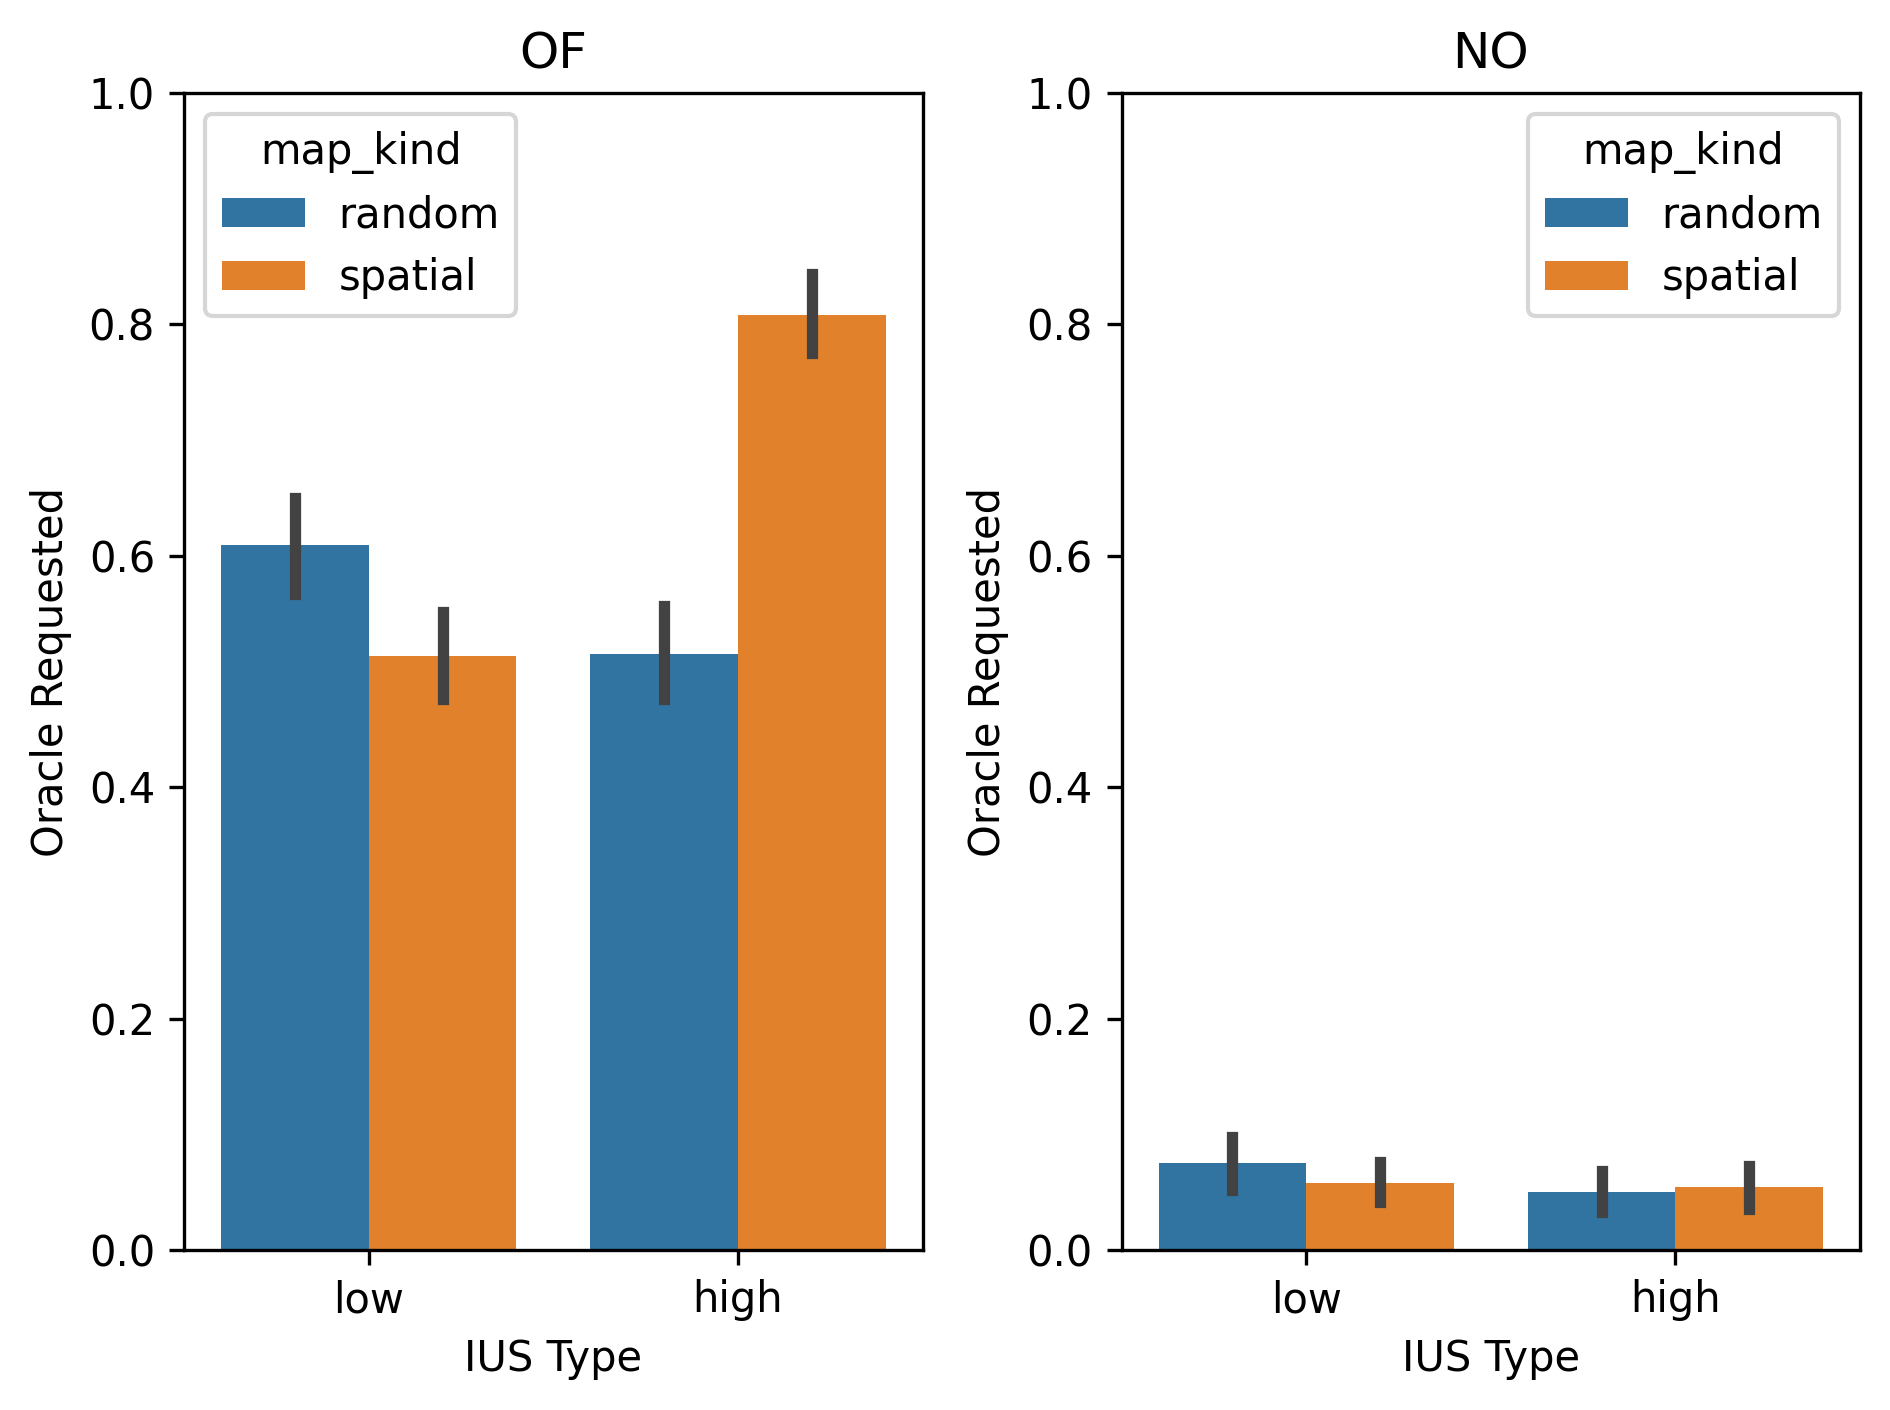

In [7]:
bars(x='ius_type', y='oracle_requested', hue='map_kind', df=df_trials, 
     ylabel="Oracle Requested", xlabel="IUS Type", 
     figure_attr="cond_best_strat", figure_vals=["OF", "NO"],
     figure_labels=["OF", "NO"])            

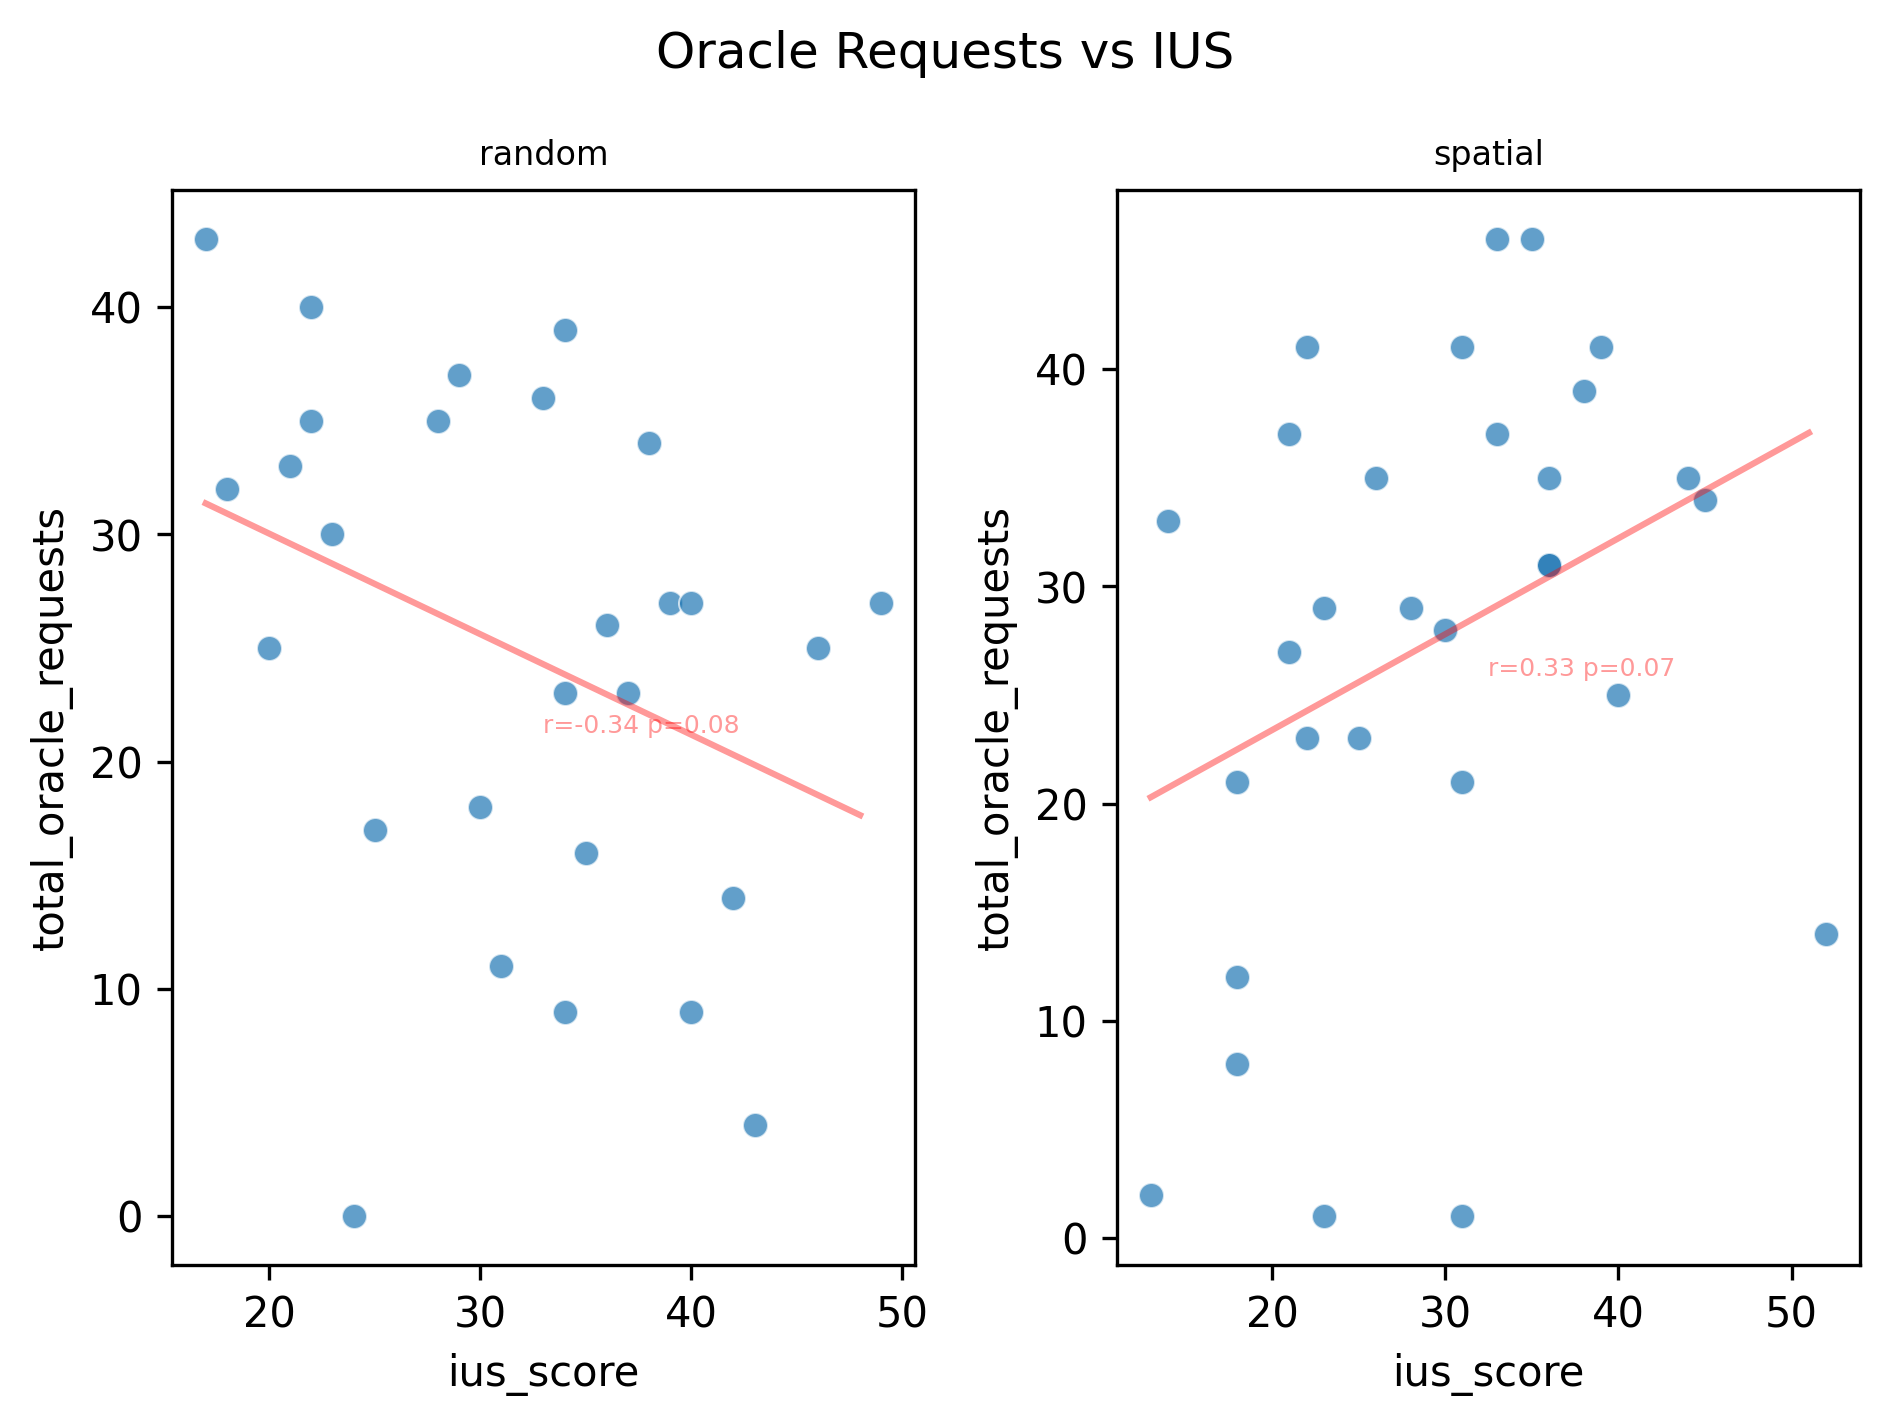

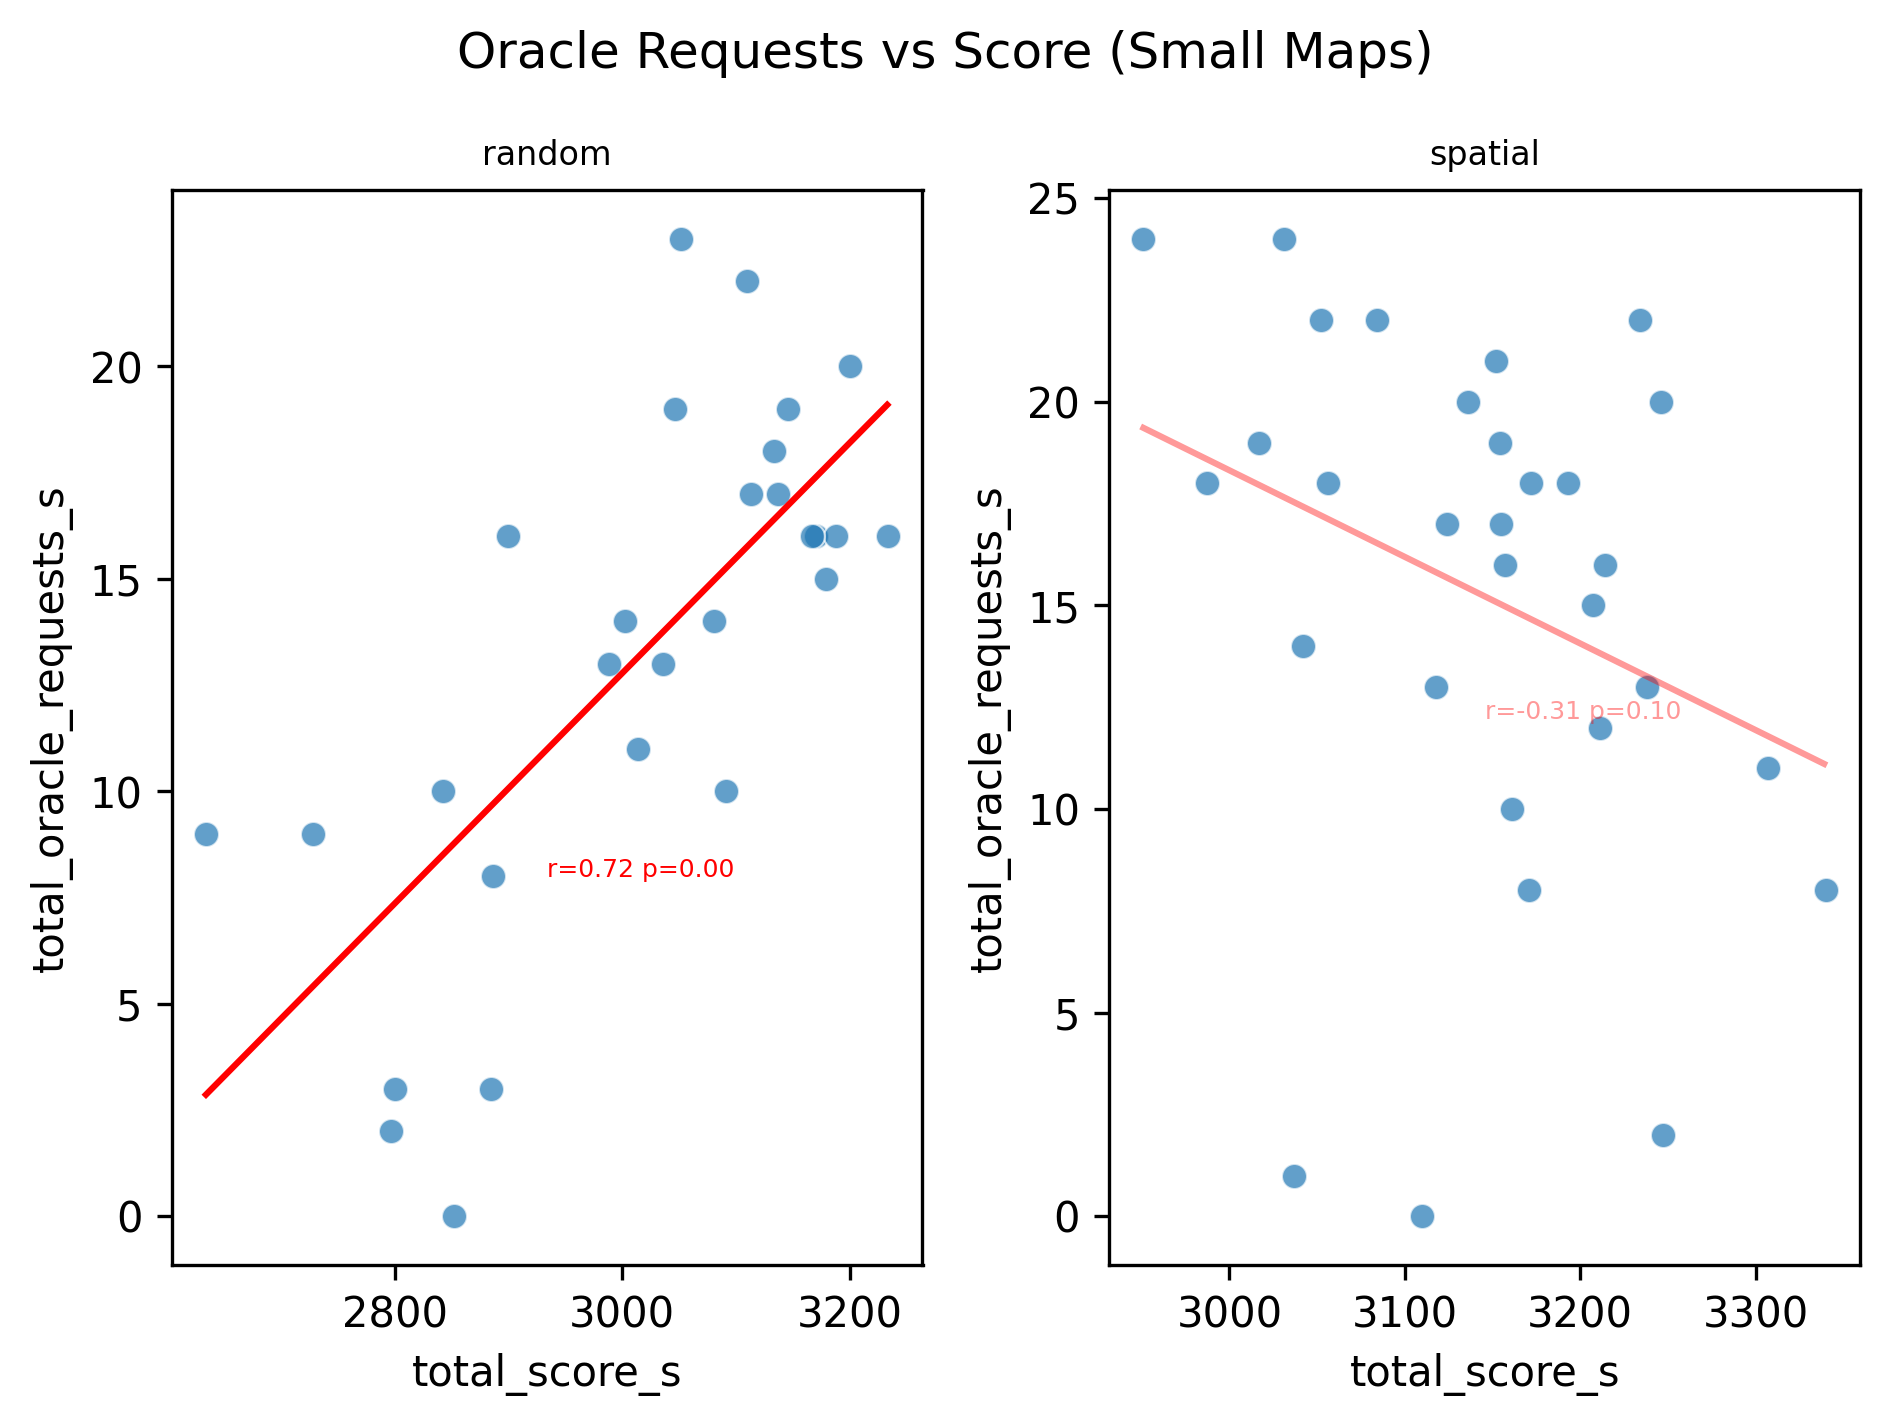

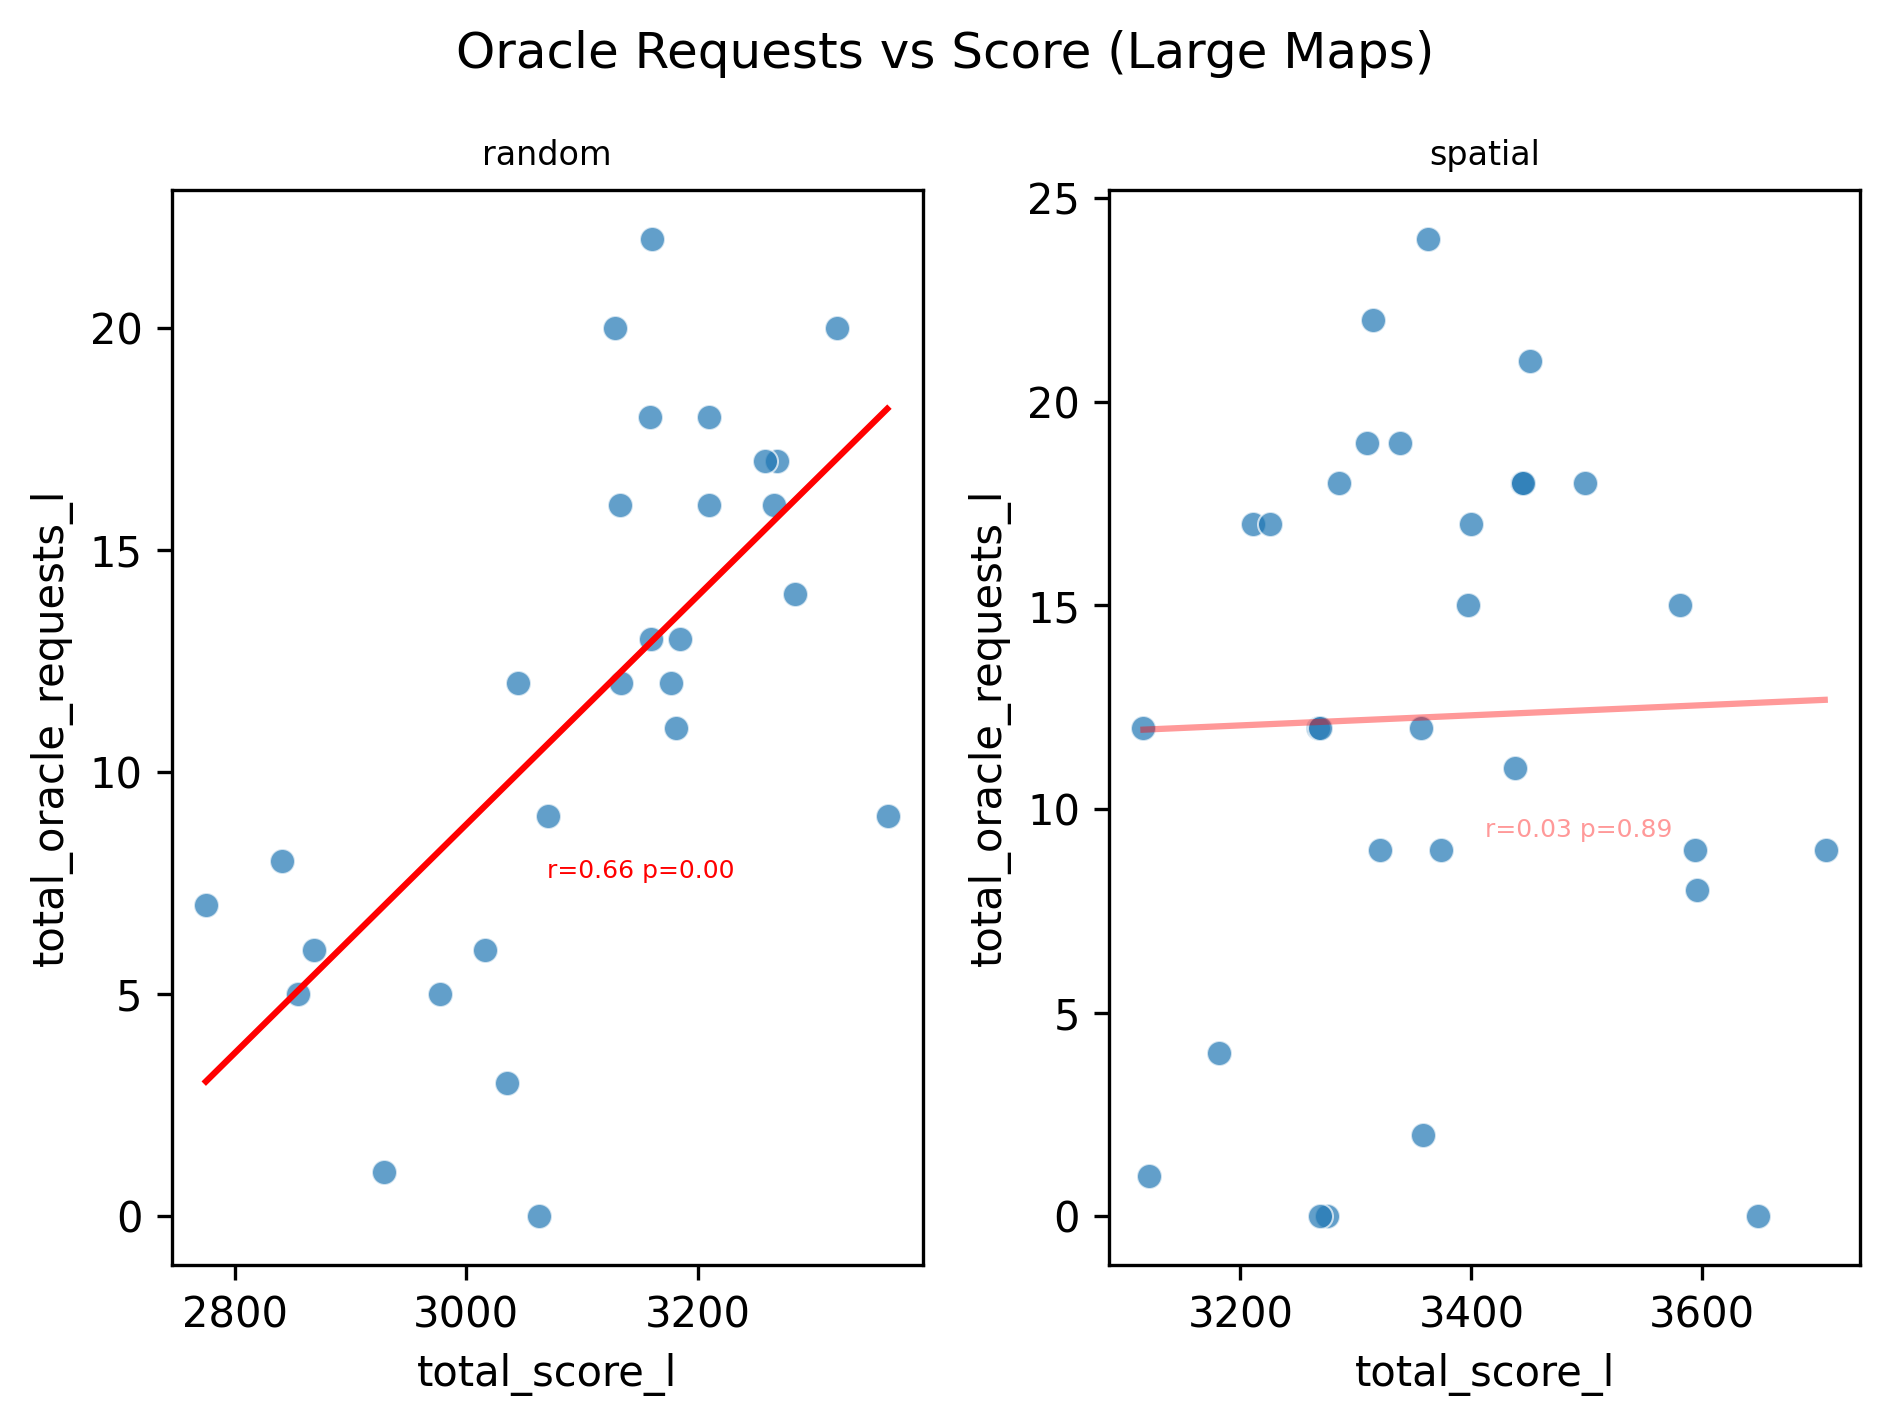

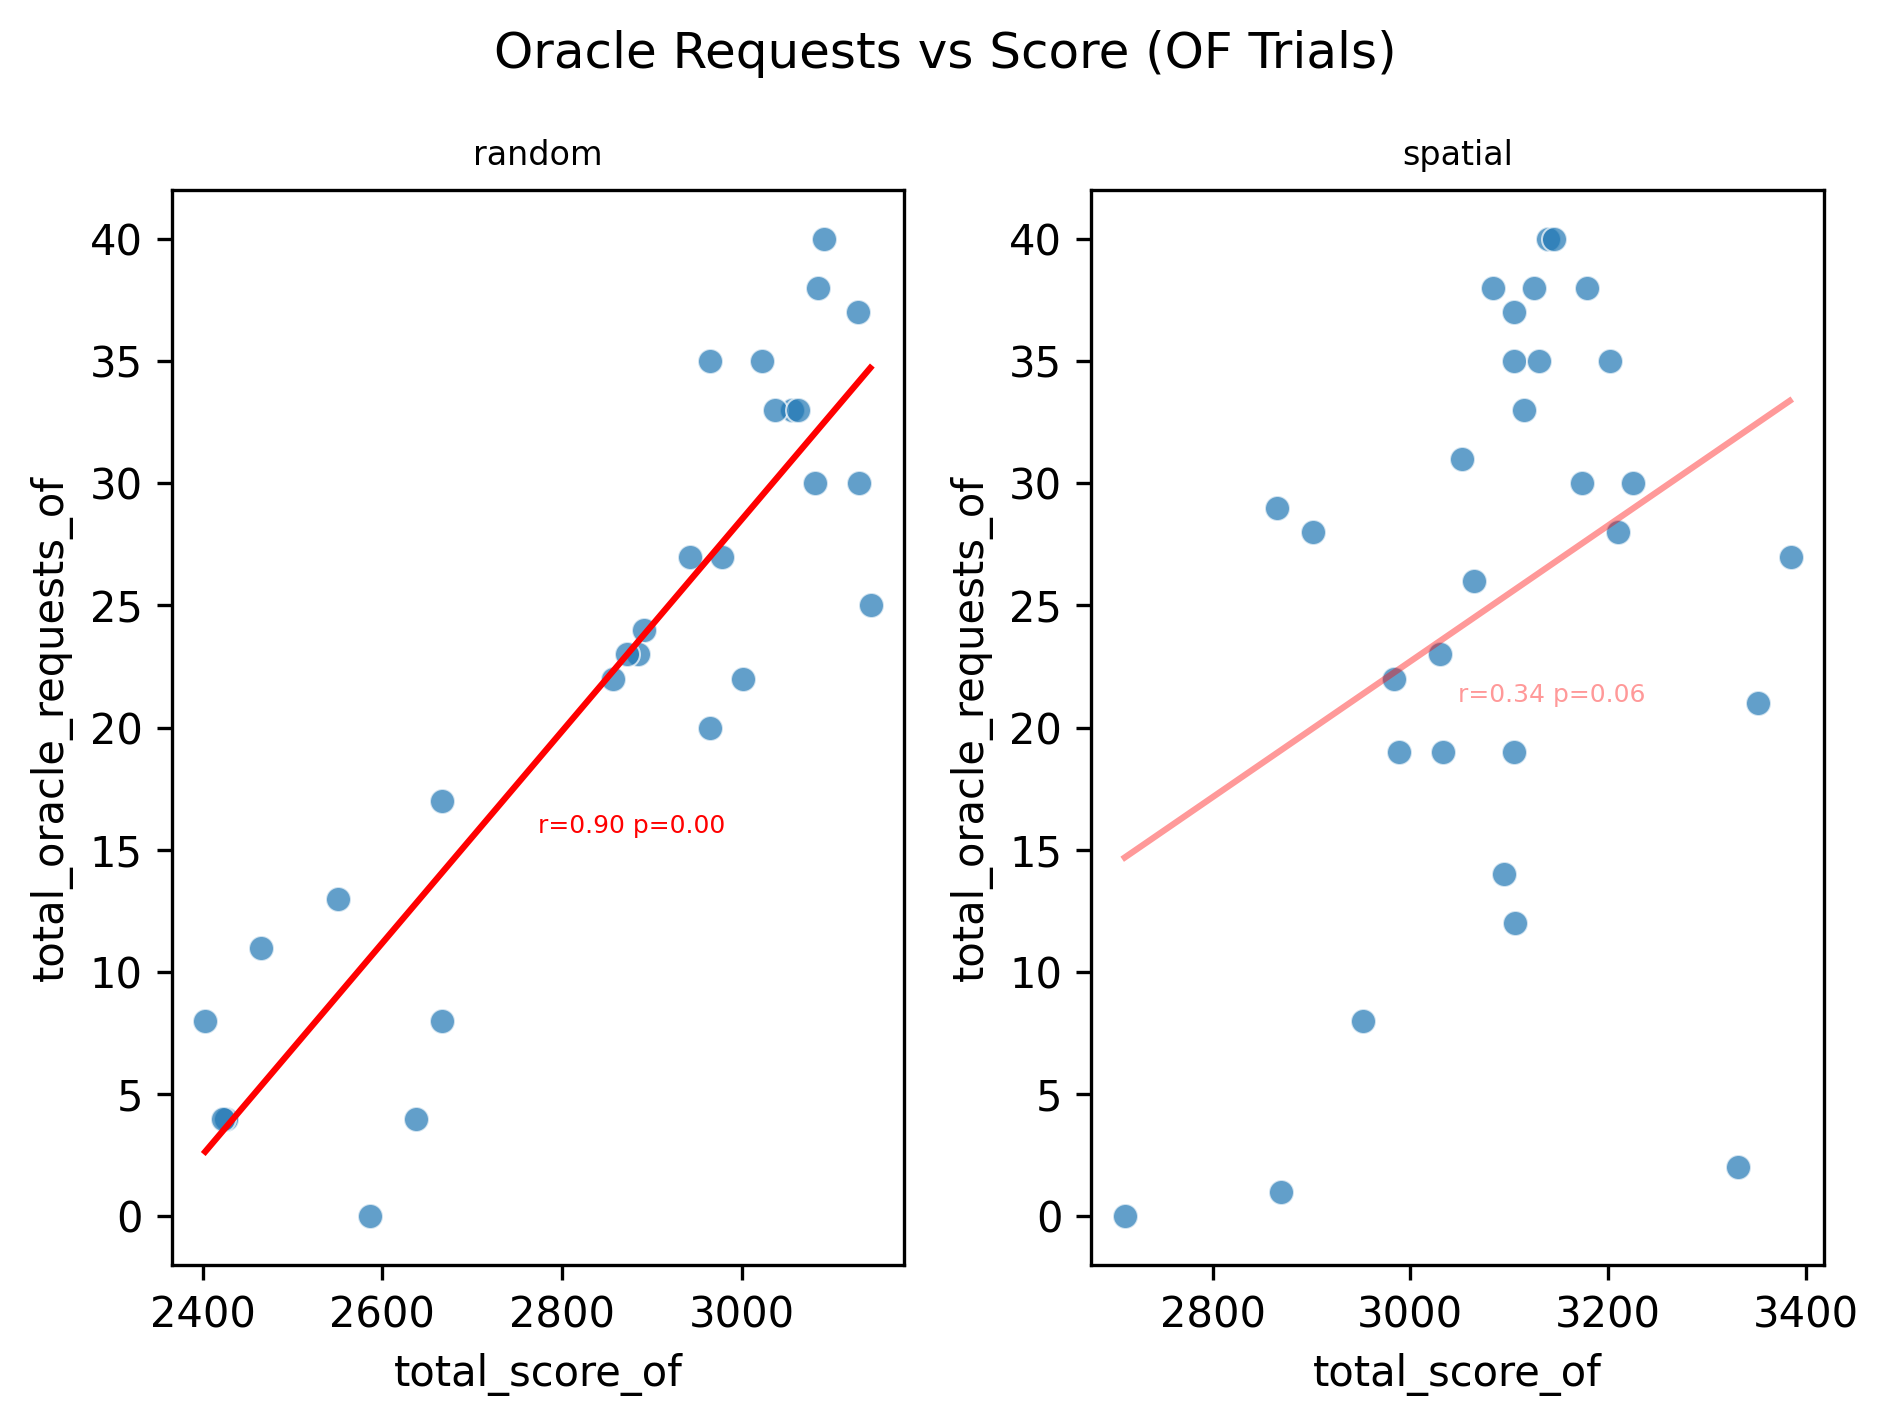

In [10]:
def split_corr_plots(x='ius_score', y='total_oracle_requests', hue=None, title="IUS vs Oracle Requests"):
    fig, axs = plt.subplots(1, 2, dpi=300)
    
    for i, map_kind in enumerate(['random', 'spatial']):
        df = df_subjs[df_subjs.map_kind == map_kind]
        X = df[x]
        Y = df[y]
        
        # Lin reg
        m, b, r, p, _ = linregress(X, Y)
        xaxis = np.arange(X.min(), X.max())
        ax = axs[i]
        sig = p <= 0.05
        alpha = 1.0 if sig else 0.4
        ax.plot(xaxis, xaxis*m+b, color='red', alpha=alpha)
        text_x = X.min() + (X.max() - X.min()) * 0.5
        ax.text(text_x, text_x*m+b - 3, "r=%.2f p=%.2f" % (r, p), color='red', fontsize=6, alpha=alpha)

        sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=ax, alpha=0.7)
        ax.set_title(map_kind, fontsize=8)
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig("./figures/%s vs %s scatter.png" % (x, y), bbox_inches=0)
    plt.show()
    
split_corr_plots(x='ius_score', y='total_oracle_requests', title="Oracle Requests vs IUS")
split_corr_plots(x='total_score_s', y='total_oracle_requests_s', title="Oracle Requests vs Score (Small Maps)")
split_corr_plots(x='total_score_l', y='total_oracle_requests_l', title="Oracle Requests vs Score (Large Maps)")
split_corr_plots(x='total_score_of', y='total_oracle_requests_of', title="Oracle Requests vs Score (OF Trials)")
#split_corr_plots(x='ius_score', y='total_correct_strat', title="Correct Strategy vs IUS")
#split_corr_plots(x='total_score', y='total_correct_strat', title="Correct Strategy vs Score")
    